
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group members:

## Evan David, ead955


## Anuraag Mohile, arm5695

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

### (a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [3]:
# set up the linear model
model = linear_model.LinearRegression()

# fit the linear model to the training data
fit = model.fit(x_train, y_train)

# get predictions on the test data
pred = model.predict(x_test)

# get the MSE
print ('Mean squared error: ', mean_squared_error(y_test, pred))

Mean squared error:  6455.708453830031


Text(0.5,1,'Linear Model')

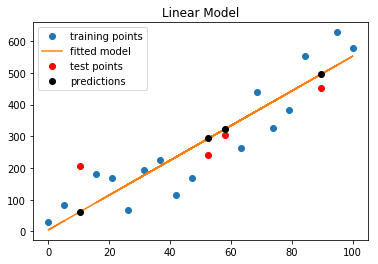

In [4]:
# build the fit line
line = fit.intercept_ + x_train*fit.coef_

# plot the data, fitted model, and predictions
plt.plot(x_train, y_train, 'o', label = 'training points')
plt.plot(x_train, line, label = 'fitted model')
plt.plot(x_test, y_test, 'o', color='red', label = 'test points')
plt.plot(x_test, pred, 'o', color='black', label = 'predictions')
plt.legend(loc='best')
plt.title('Linear Model')

### (b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# set up degree 1 polynomial
poly = PolynomialFeatures(degree=1)

# transform the data
X_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

lg = linear_model.LinearRegression()

# Fit
fit = lg.fit(X_, y_train)

# get the predictions and MSE
y_pred = fit.predict(X_test_)
print ('Mean squared error (Degree 1): ', mean_squared_error(y_test, y_pred))

Mean squared error (Degree 1):  6455.70845383002


Text(0.5,1,'Degree 1 Polynomial')

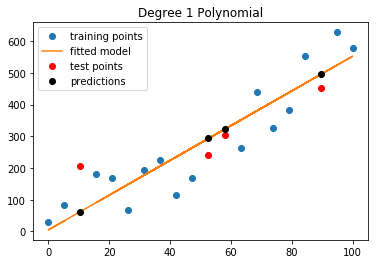

In [6]:
line = fit.intercept_ + x_train*fit.coef_[0][1]
plt.plot(x_train, y_train, 'o', label = 'training points')
plt.plot(x_train, line, label = 'fitted model')
plt.plot(x_test, y_test, 'o', color='red', label = 'test points')
plt.plot(x_test, y_pred, 'o', color='black', label = 'predictions')
plt.legend(loc='best')
plt.title('Degree 1 Polynomial')

In [7]:
# set up degree 2 polynomial
poly = PolynomialFeatures(degree=2)

# transform the data
X_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

# fit the model
fit = lg.fit(X_, y_train)

# get the predictions on test data 
y_pred = fit.predict(X_test_)

# get the MSE
print ('Mean squared error (Degree 2): ', mean_squared_error(y_test, y_pred))

Mean squared error (Degree 2):  4683.309906329018


Text(0.5,1,'Degree 2 Polynomial')

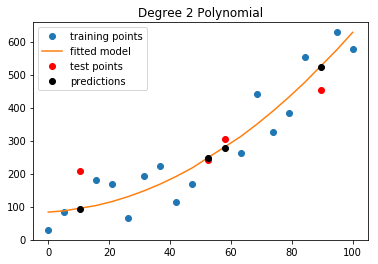

In [8]:
line = fit.intercept_ + x_train*fit.coef_[0][1] + (x_train**2)*fit.coef_[0][2]
plt.plot(x_train, y_train, 'o', label = 'training points')
plt.plot(sorted(x_train), sorted(line), label = 'fitted model')
plt.plot(x_test, y_test, 'o', color='red', label = 'test points')
plt.plot(x_test, y_pred, 'o', color='black', label = 'predictions')
plt.legend(loc='best')
plt.title('Degree 2 Polynomial')

In [9]:
# set up degree 3 polynomial
poly = PolynomialFeatures(degree=3)

# transform the data
X_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

# fit the model
fit = lg.fit(X_, y_train)

# get the predictions on test data
y_pred=lg.predict(X_test_)

# get the MSE
print ('Mean squared error (Degree 3): ', mean_squared_error(y_test, y_pred))

Mean squared error (Degree 3):  4602.202716053174


Text(0.5,1,'Degree 3 Polynomial')

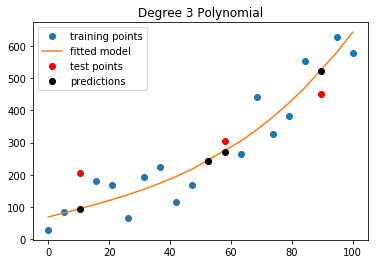

In [10]:
line = fit.intercept_ + x_train*fit.coef_[0][1] + (x_train**2)*fit.coef_[0][2] + (x_train**3)*fit.coef_[0][3]
plt.plot(x_train, y_train, 'o', label = 'training points')
plt.plot(sorted(x_train), sorted(line), label = 'fitted model')
plt.plot(x_test, y_test, 'o', color='red', label = 'test points')
plt.plot(x_test, y_pred, 'o', color='black', label = 'predictions')
plt.legend(loc='best')
plt.title('Degree 3 Polynomial')

In [11]:
# set up degree 5 polynomial
poly = PolynomialFeatures(degree=5)

# transform the data
X_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

# fit the model
fit = lg.fit(X_, y_train)

# get the predictions on test data
y_pred=lg.predict(X_test_)

# get the MSE
print ('Mean squared error (Degree 5): ', mean_squared_error(y_test, y_pred))

Mean squared error (Degree 5):  6599.133603518122


Text(0.5,1,'Degree 5 Polynomial')

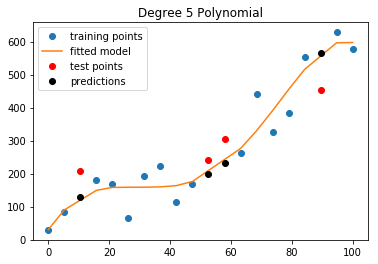

In [12]:
line = fit.intercept_ + x_train*fit.coef_[0][1] + (x_train**2)*fit.coef_[0][2] + (x_train**3)*fit.coef_[0][3] + (x_train**4)*fit.coef_[0][4] + (x_train**5)*fit.coef_[0][5]
plt.plot(x_train, y_train, 'o', label = 'training points')
plt.plot(sorted(x_train), sorted(line), label = 'fitted model')
plt.plot(x_test, y_test, 'o', color='red', label = 'test points')
plt.plot(x_test, y_pred, 'o', color='black', label = 'predictions')
plt.legend(loc = 'best')
plt.title('Degree 5 Polynomial')

### (c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

The Polynomial model of degree 3 performed the best. For lower degree models, the variance was lower but the bias was high and for a higher degree model, the bias was lower but variance was high. Therefore the best tradeoff between bias and variance was at the degree 3 model and thus the overall error was lower.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

### (a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [14]:
# get the shape of the data
print (data.shape)

(200, 4)


In [15]:
# show the first 5 rows
data[:5]

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### (b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

Text(0.5,1,'Box-plot of the data')

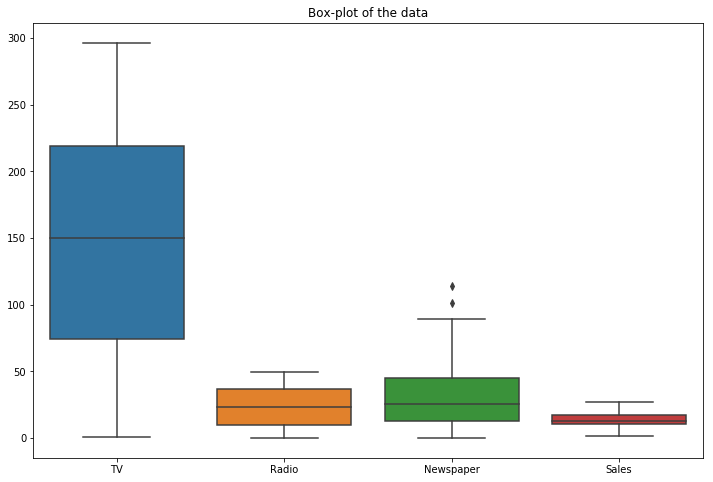

In [16]:
import seaborn as sns
from matplotlib import pyplot

TV = data['TV']
dims = (12,8)
fig, ax = pyplot.subplots(figsize=dims)

# get boxplot of the four columns
sns.boxplot(ax=ax, data=data).set_title('Box-plot of the data')

In [17]:
# get some range statistics to determine cutoff values
stat = data.describe()

# get the interquartile ranges
IQR_TV = stat['TV']['75%'] - stat['TV']['25%']
IQR_Radio = stat['Radio']['75%'] - stat['Radio']['25%']
IQR_Newspaper = stat['Newspaper']['75%'] - stat['Newspaper']['25%']
IQR_Sales = stat['Sales']['75%'] - stat['Sales']['25%']

# get cutoff value for TV
cutoff_TV = stat['TV']['75%'] + 1.5 * IQR_TV

# get cutoff value for Radio
cutoff_Radio = stat['Radio']['75%'] + 1.5 * IQR_Radio

# get cutoff value for Newspaper
cutoff_Newspaper = stat['Newspaper']['75%'] + 1.5 * IQR_Newspaper

# get cutoff value for Newspaper
cutoff_Sales = stat['Sales']['75%'] + 1.5 * IQR_Sales

# print the cutoff values
print ('Cutoff value (TV): ', cutoff_TV)
print ('Cutoff value (Radio): ', cutoff_Radio)
print ('Cutoff value (Newspaper): ', round(cutoff_Newspaper, 2))
print ('Cutoff value (Sales): ', round(cutoff_Sales, 2))

Cutoff value (TV):  435.5
Cutoff value (Radio):  76.35
Cutoff value (Newspaper):  93.62
Cutoff value (Sales):  27.94


It should be noted that the cutoff values shown are the upper bound cutoff values. All of the lower bound cutoff values are zero, because mathematically they would be negative but we can't have negative values for TV, Sales, etc.

### (c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

Text(0,0.5,'Sales')

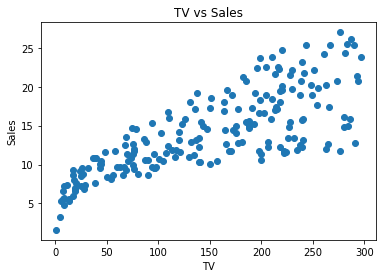

In [18]:
# look at a scatterplot of Sales and TV
plt.scatter(data['TV'], data['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0,0.5,'Sales')

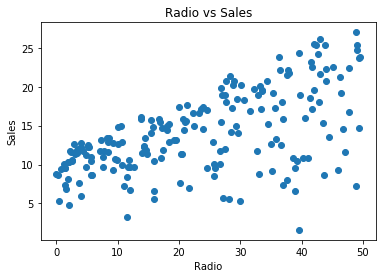

In [19]:
# look at a scatterplot of Sales and Radio
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0,0.5,'Sales')

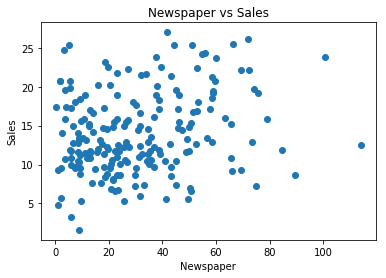

In [20]:
# look at a scatterplot of Sales and Newspaper
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

Based on all of these scatterplots, it seems like TV has the best fit relationship with Sales out of the three features. Radio has less of a fit with Sales than TV, but there is still a generally positive relationship seen. Finally, the least good fit is Newspaper on Sales, as the data is very spread out and you can only see a slight positive relationship.

### (d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [21]:
import statsmodels.api as sm
from patsy import dmatrices

# setting up the design matrix
y, X = dmatrices('Sales ~ TV', data=data, return_type='dataframe')


model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)

# show the results, from this we can see the coefficient
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        17:37:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

The coefficient for TV is 0.0475, and the interpretation of this coefficient is that it takes $47.50 of advertising dollars spent on TV to increase sales by a thousand widgets.

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

### (e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [22]:
from sklearn.cross_validation import train_test_split

y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=data, return_type='dataframe')
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42) 

C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# set up the model
mlr = linear_model.LinearRegression()

# fit the model with training data
mlrfit = mlr.fit(X_train, y_train)

# predict on the test data
mlrpred = mlrfit.predict(X_test)

# get the RMSE
print ('RMSE: ' , np.sqrt(mean_squared_error(y_test, mlrpred)))

RMSE:  1.9307843822347208


### (f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [24]:
# get predictions on training data
mlrinsample = mlrfit.predict(X_train)

# get the train and test MSE
print ('MSE (train): ', mean_squared_error(y_train, mlrinsample))
print ('MSE (test): ', mean_squared_error(y_test, mlrpred))
print ('Difference: ', mean_squared_error(y_test, mlrpred) - mean_squared_error(y_train, mlrinsample))

MSE (train):  2.4108586545578548
MSE (test):  3.7279283306815123
Difference:  1.3170696761236576


The MSE increases by 1.317 when the model is scored on test data

### (g) (1pts) Report the coefficients obtained by your model.

In [25]:
# get the coefficients
print('Coefficient of TV: ', mlrfit.coef_[0][1])
print('Coefficient of Radio: ', mlrfit.coef_[0][2])
print('Coefficient of Newspaper: ', mlrfit.coef_[0][3])

Coefficient of TV:  0.044665120632712815
Coefficient of Radio:  0.19663006282624843
Coefficient of Newspaper:  0.006074386547886864


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [26]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

### a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [28]:
# set up the mlr model
mlr = linear_model.LinearRegression()

# fit the model on training data
mlrfit = mlr.fit(X_train, y_train)

# get the predictions for training data
mlrtrain = mlrfit.predict(X_train)

# get the predictions for test data
mlrtest = mlrfit.predict(X_test)

# get the RMSEs
print ('RMSE (train): ', np.sqrt(mean_squared_error(y_train, mlrtrain)))
print ('RMSE (test): ', np.sqrt(mean_squared_error(y_test, mlrtest)))
print ('Difference: ', np.sqrt(mean_squared_error(y_test, mlrtest)) - np.sqrt(mean_squared_error(y_train, mlrtrain)))

RMSE (train):  52.007732294217874
RMSE (test):  57.428059772853565
Difference:  5.420327478635691


The RMSE increases by 5.42 when the model is scored on X_test.

### b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [29]:
# set up the model using Huber loss
huber = linear_model.HuberRegressor(alpha=0.0)

# fit the model to the training data
huberfit = huber.fit(X_train, y_train)

# get predictions on training data
hubertrain = huberfit.predict(X_train)

# get predictions on test data
hubertest = huberfit.predict(X_test)

# get the RMSEs
print ('RMSE (train): ', np.sqrt(mean_squared_error(y_train, hubertrain)))
print ('RMSE (test): ', np.sqrt(mean_squared_error(y_test, hubertest)))

RMSE (train):  52.16357275654772
RMSE (test):  57.15007488048903


Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

### c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

In [30]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

# set up the mlr model
outlier = linear_model.LinearRegression()

# fit the model on the training data including the outlier
outlierfit = outlier.fit(X_train, y_train_outliers)

# get the predictions on the training data
outliertrain = outlierfit.predict(X_train)

# get the predictions on test data
outliertest = outlierfit.predict(X_test)

# get the RMSEs
print ('RMSE (train): ', np.sqrt(mean_squared_error(y_train_outliers, outliertrain)))
print ('RMSE (test): ', np.sqrt(mean_squared_error(y_test, outliertest)))

RMSE (train):  286.2641030656008
RMSE (test):  82.21820407137496


### d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [31]:
# set up the model with Huber loss
huber_out = linear_model.HuberRegressor(alpha=0.0)

# fit the model with the training data including the outlier
huberfit_out = huber.fit(X_train, y_train_outliers)

# get the predictions on the training data
hubertrain_out = huberfit_out.predict(X_train)

# get the predictions on test data
hubertest_out = huberfit_out.predict(X_test)

# get the RMSEs
print ('RMSE (train): ', np.sqrt(mean_squared_error(y_train_outliers, hubertrain_out)))
print ('RMSE (test): ', np.sqrt(mean_squared_error(y_test, hubertest_out)))

RMSE (train):  290.2226909607711
RMSE (test):  57.56522357131555


The test RMSE with Huber loss was much lower than the test RMSE for the other model because the Huber loss function increases linearly so it will be more robust to outliers, however the ordinary MLR model employs a traditional cost function that is nonlinear and penalizes outliers, thus the RMSE is higher.

### e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

In [32]:
# get the residuals for the outlier model
residuals = y_test - outliertest

# get the residuals for the huber loss model with the outlier
huberresiduals = y_test - hubertest_out

Text(0.5,1,'Traditional Model')

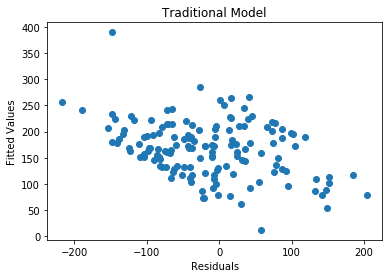

In [33]:
# plot the residuals vs fitted values for outlier model
plt.scatter(residuals, outliertest)
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.title('Traditional Model')

Text(0.5,1,'Huber Loss Model')

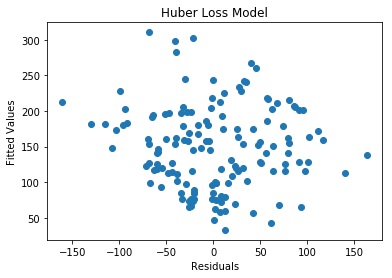

In [34]:
# plot the residuals vs fitted values for Huber loss model 
plt.scatter(huberresiduals, hubertest_out)
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.title('Huber Loss Model')

We observe that the residuals are less spread out in the model that used Huber loss, so this would be the better model when you have outliers. The error is higher for the traditional MLR model and this can be seen by the residuals being more spread out, and this is due to the outlier. So overall the Huber loss helps the model when dealing with outliers.

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.





### f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

In [35]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


In [36]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

# employ backward feature selection on the training data
s = RFE(mlrfit,3).fit(X_train, y_train)

s.ranking_

array([8, 6, 1, 2, 1, 5, 4, 3, 1, 7])

In [37]:
print ('The 3 most significant features are: ', feature_name[2], feature_name[4], feature_name[8])

The 3 most significant features are:  x3 x5 x9


### g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [38]:
import numpy as np

error=1000000

for i in range(0,10):
    X_train_one=[]
    X_test_one=[]
    for j in range(0,len(X_train)):
        X_train_one.append([X_train[j][i]])
    for k in range(0,len(X_test)):
        X_test_one.append([X_test[k][i]])
    mlr = linear_model.LinearRegression()
    mlrfit = mlr.fit(X_train_one, y_train)
    mlrtest = mlrfit.predict(X_test_one)
    RMSE=np.sqrt(mean_squared_error(y_test, mlrtest))
    if RMSE < error:
        error=RMSE
        best_feature='x'+str(i+1)
print(best_feature,error)

x9 64.2682588323663


In [39]:
new_range=[]
for i in range(0,10):
    new_range.append(i)
new_range.pop(int(best_feature[1])-1)
new_range
error2=1000000

for i in new_range:
    X_train_two=[]
    X_test_two=[]
    for j in range(0,len(X_train)):
        X_train_two.append([X_train[j][i],X_train[j][int(best_feature[1])-1]])
    for k in range(0,len(X_test)):
        X_test_two.append([X_test[k][i],X_test[k][int(best_feature[1])-1]])
    mlr = linear_model.LinearRegression()
    mlrfit = mlr.fit(X_train_two, y_train)
    mlrtest = mlrfit.predict(X_test_two)
    RMSE=np.sqrt(mean_squared_error(y_test, mlrtest))
    if RMSE < error2:
        error2=RMSE
        best_feature_pair='x'+str(i+1),best_feature
print (best_feature_pair,error2)

('x3', 'x9') 58.225285200000044


In [40]:
new_range=[]
for i in range(0,10):
    new_range.append(i)
new_range.pop(int(best_feature[1])-1)
new_range.pop(int(best_feature_pair[0][1])-1)
error3=1000000

for i in new_range:
    X_train_three=[]
    X_test_three=[]
    for j in range(0,len(X_train)):
        X_train_three.append([X_train[j][i],X_train[j][int(best_feature[1])-1],X_train[j][int(best_feature_pair[0][1])-1]])
    for k in range(0,len(X_test)):
        X_test_three.append([X_test[k][i],X_test[k][int(best_feature[1])-1],X_test[k][int(best_feature_pair[0][1])-1]])
    mlr = linear_model.LinearRegression()
    mlrfit = mlr.fit(X_train_three, y_train)
    mlrtest = mlrfit.predict(X_test_three)
    RMSE=np.sqrt(mean_squared_error(y_test, mlrtest))
    if RMSE < error3:
        error3=RMSE
        best_three_features=['x'+str(i+1),best_feature_pair[0],best_feature_pair[1]]
print ('The 3 most significant features are: ' ,best_three_features[1],best_three_features[0],best_three_features[2])

The 3 most significant features are:  x3 x4 x9


This is a different feature set than we got from backward selection, but we do have two of the same features from backward, as the common features are x3 and x9, however the difference is that in the forward selection we got x4 as a feature while in backward selection we got x5 as a feature.

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

### (a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

In [41]:
# we are given p
p = 0.3

# we know alpha is 1 minus the confidence
a = 0.1

# epsilon is the margin of error given
e = 0.09

# we know the z value based on alpha
z = 1.65

# here is the equation to find n
n = p*(1.0-p)*(z/e)**2

# print the necessary sample size
print ('Sample size needed: ', round(n))

Sample size needed:  71


### (b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

In [42]:
# p is the same
p = 0.3

# alpha is changed
a = 0.05

# epsilon is the same
e = 0.09

# we know the z value based on the new alpha
z = 1.96

# same formula to find n
n = p*(1.0-p)*(z/e)**2

# get the necessary sample size
print ('Required sample size: ', round(n))

Required sample size:  100


### (c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

In [43]:
# p now becomes 0.5 for the worst case scenario
p = 0.5

# just the same formula to get n
n = p*(1.0-p)*(z/e)**2

# get the required sample size
print ('Required sample size: ', round(n))

Required sample size:  119


# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [44]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

### (a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

Text(0.5,1,'First two principal components')

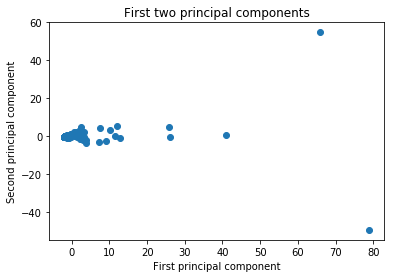

In [46]:
from sklearn.decomposition import PCA

# set up the pca
pca = PCA()

X = df_scaled

# fit the pca to the data
fit = pca.fit(X)

# transform the data into principal components
X_pca = pca.transform(X)

# scatter plot of the first two principal components
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('First two principal components')

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

In [47]:
df['pc1'] = X_pca[:,0]
df['pc2'] = X_pca[:,1]

# get the six countries with highest first component
x = df['pc1'].sort_values(ascending=False).index.values[:6]
print(x)

['China' 'Canada' 'Mexico' 'Japan' 'Germany' 'Italy']


(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

Text(0.5,1,'Scree Plot')

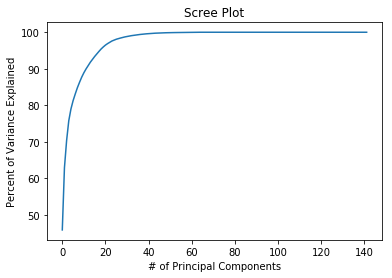

In [48]:
# this will get the explained variance for each component
var = fit.explained_variance_ratio_

# gets the cumulative proportion of variance
var1 = np.cumsum(np.round(var, decimals=4)*100)

# scree plot of cumulative proportion of variance explained
plt.plot(var1)
plt.xlabel('# of Principal Components')
plt.ylabel('Percent of Variance Explained')
plt.title('Scree Plot')

In [49]:
# show the cumulative proportion of variance explained
var1

array([ 45.84,  62.9 ,  70.34,  75.75,  78.96,  81.25,  83.09,  84.82,
        86.31,  87.71,  88.91,  89.95,  90.9 ,  91.8 ,  92.6 ,  93.37,
        94.08,  94.77,  95.43,  95.99,  96.49,  96.9 ,  97.27,  97.61,
        97.86,  98.09,  98.27,  98.43,  98.59,  98.73,  98.85,  98.97,
        99.07,  99.16,  99.25,  99.33,  99.4 ,  99.47,  99.53,  99.58,
        99.63,  99.67,  99.71,  99.75,  99.78,  99.81,  99.83,  99.85,
        99.87,  99.89,  99.9 ,  99.91,  99.92,  99.93,  99.94,  99.95,
        99.96,  99.97,  99.98,  99.99, 100.  , 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
      

### (d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

We can see from the above array that the principal components required to explain cumulative variance are as follows:

30%: 1   
60%: 2  
90%: 13  

# Question 5. PCA (conceptual) (10pts)

### (a) (5pts) Give two reasons why we might want to use PCA.

i) Dimensionality Reduction- PCA is most commonly used to condense the information contained in a large number of original         variables into a smaller set of new composite dimensions, with a minimum loss of information.

  ii) PCA can be used to discover important features of a large data set. It often reveals relationships that were previously         unsuspected, thereby allowing interpretations that would not ordinarily result.

### (b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

The eigenvectors represent the directions of the components and the eigenvalues represent the amount of variance                explained by that direction. Thus, the first principal component is the direction (eigenvector) with the highest eigenvalue and        those directions with lowest (zero or close to zero) eigen value can be ignored thus, allowing dimensionality reduction.